In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../dataset/asteroid_training.csv')
unknown_objects = pd.read_csv('../dataset/unknown_asteroids.csv')

In [564]:
#this is the unseen data
unknown_objects

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude
0,769101,Object_769101,0.080270,0.179490,13424.551015,4.402380e+07,Earth,False,22.60
1,2678807,Object_2678807,0.160900,0.359782,42382.349410,2.360300e+07,Earth,False,21.09
2,49457195,Object_49457195,0.001011,0.002260,34025.400503,4.754401e+07,Earth,False,32.10
3,16313339,Object_16313339,0.140138,0.313357,31231.743804,6.324553e+07,Earth,False,21.39
4,28929909,Object_28929909,0.066766,0.149293,12905.227080,3.856273e+07,Earth,False,23.00
...,...,...,...,...,...,...,...,...,...
1495,48611083,Object_48611083,0.020350,0.045503,59142.861233,3.919877e+07,Earth,False,25.58
1496,4423994,Object_4423994,0.231502,0.517654,42876.660182,4.656072e+07,Earth,False,20.30
1497,5718958,Object_5718958,0.025856,0.057815,61043.549488,5.129316e+07,Earth,False,25.06
1498,38339775,Object_38339775,0.319562,0.714562,48822.182935,2.540669e+07,Earth,False,19.60


In [565]:
unknown_objects.isnull().sum()
#there are no null values in the unseen data

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
dtype: int64

In [566]:
unknown_objects.drop_duplicates()
#there are no duplicates in the unseen data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude
0,769101,Object_769101,0.080270,0.179490,13424.551015,4.402380e+07,Earth,False,22.60
1,2678807,Object_2678807,0.160900,0.359782,42382.349410,2.360300e+07,Earth,False,21.09
2,49457195,Object_49457195,0.001011,0.002260,34025.400503,4.754401e+07,Earth,False,32.10
3,16313339,Object_16313339,0.140138,0.313357,31231.743804,6.324553e+07,Earth,False,21.39
4,28929909,Object_28929909,0.066766,0.149293,12905.227080,3.856273e+07,Earth,False,23.00
...,...,...,...,...,...,...,...,...,...
1495,48611083,Object_48611083,0.020350,0.045503,59142.861233,3.919877e+07,Earth,False,25.58
1496,4423994,Object_4423994,0.231502,0.517654,42876.660182,4.656072e+07,Earth,False,20.30
1497,5718958,Object_5718958,0.025856,0.057815,61043.549488,5.129316e+07,Earth,False,25.06
1498,38339775,Object_38339775,0.319562,0.714562,48822.182935,2.540669e+07,Earth,False,19.60


In [567]:
#this is the training data
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,26150198,Object_26150198,0.031956,0.071456,75374.759095,1.070689e+06,Earth,False,24.60,False
1,7025688,Object_7025688,0.133216,0.297879,33274.114790,1.598217e+07,Earth,False,21.50,False
2,43368461,Object_43368461,0.043507,0.097284,74702.349802,2.330585e+06,Earth,False,23.93,False
3,41099354,Object_41099354,0.012149,0.027167,33078.313997,4.561178e+07,Earth,False,26.70,False
4,25572576,Object_25572576,0.058151,0.130029,51956.093518,3.613123e+06,Earth,False,23.30,False
...,...,...,...,...,...,...,...,...,...,...
9078,36478193,Object_36478193,0.009006,0.020139,23099.050602,5.684655e+06,Earth,False,27.35,False
9079,16202568,Object_16202568,0.265800,0.594347,10471.823883,5.344484e+07,Earth,False,20.00,False
9080,46971691,Object_46971691,0.934448,2.089488,63346.840101,6.688082e+07,Earth,False,17.27,True
9081,14373311,Object_14373311,0.007666,0.017141,23682.903814,4.247773e+05,Earth,False,27.70,False


In [568]:
data.isnull().sum()
#there are no null values in the training data

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [569]:
data.drop_duplicates()
#there are no duplicates in the training data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,26150198,Object_26150198,0.031956,0.071456,75374.759095,1.070689e+06,Earth,False,24.60,False
1,7025688,Object_7025688,0.133216,0.297879,33274.114790,1.598217e+07,Earth,False,21.50,False
2,43368461,Object_43368461,0.043507,0.097284,74702.349802,2.330585e+06,Earth,False,23.93,False
3,41099354,Object_41099354,0.012149,0.027167,33078.313997,4.561178e+07,Earth,False,26.70,False
4,25572576,Object_25572576,0.058151,0.130029,51956.093518,3.613123e+06,Earth,False,23.30,False
...,...,...,...,...,...,...,...,...,...,...
9078,36478193,Object_36478193,0.009006,0.020139,23099.050602,5.684655e+06,Earth,False,27.35,False
9079,16202568,Object_16202568,0.265800,0.594347,10471.823883,5.344484e+07,Earth,False,20.00,False
9080,46971691,Object_46971691,0.934448,2.089488,63346.840101,6.688082e+07,Earth,False,17.27,True
9081,14373311,Object_14373311,0.007666,0.017141,23682.903814,4.247773e+05,Earth,False,27.70,False


In [570]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9083 non-null   int64  
 1   name                9083 non-null   object 
 2   est_diameter_min    9083 non-null   float64
 3   est_diameter_max    9083 non-null   float64
 4   relative_velocity   9083 non-null   float64
 5   miss_distance       9083 non-null   float64
 6   orbiting_body       9083 non-null   object 
 7   sentry_object       9083 non-null   bool   
 8   absolute_magnitude  9083 non-null   float64
 9   hazardous           9083 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 585.6+ KB


In [571]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9083.0,2.515456e+07,1.424013e+07,509612.000000,1.286088e+07,2.516307e+07,3.757898e+07,4.999238e+07
est_diameter_min,9083.0,1.256825e-01,3.352224e-01,0.000818,1.925551e-02,4.836765e-02,1.394938e-01,2.304385e+01
est_diameter_max,9083.0,2.810347e-01,7.495801e-01,0.001828,4.305662e-02,1.081534e-01,3.119177e-01,5.152761e+01
relative_velocity,9083.0,4.765817e+04,2.500650e+04,494.185355,2.837452e+04,4.402305e+04,6.243393e+04,1.835519e+05
miss_distance,9083.0,3.696279e+07,2.217602e+07,13672.003656,1.712688e+07,3.819473e+07,5.596681e+07,7.479223e+07
absolute_magnitude,9083.0,2.356879e+01,2.878480e+00,10.310000,2.140000e+01,2.370000e+01,2.570000e+01,3.256000e+01


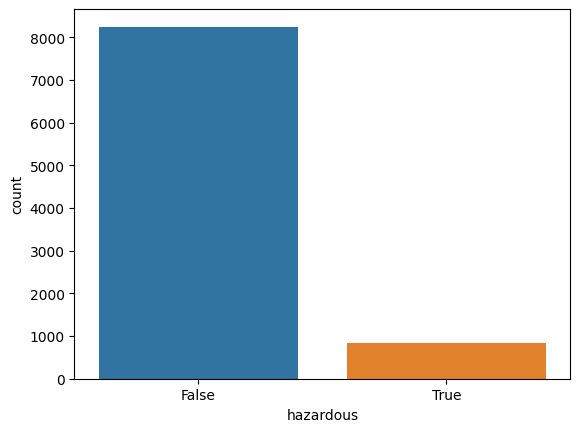

In [572]:
sns.countplot(data=data, x='hazardous')
plt.show()
#the following plot shows that 'hazardous' has a class imbalance, if we train our model using this column as it is, 
#then the model will have a bias towards 'False', hence in the following cells, we will use SMOTE to add synthetic 
#entries to our dataset to counter this imbalance

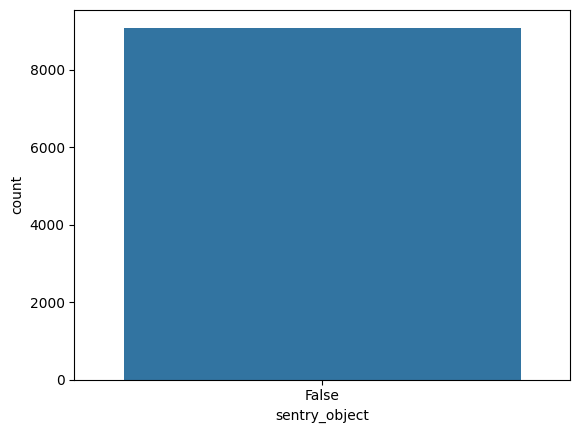

In [573]:
sns.countplot(data=data, x='sentry_object')
plt.show()
#all the values in this feature are the same hence, it doesn't provide useful information for prediction

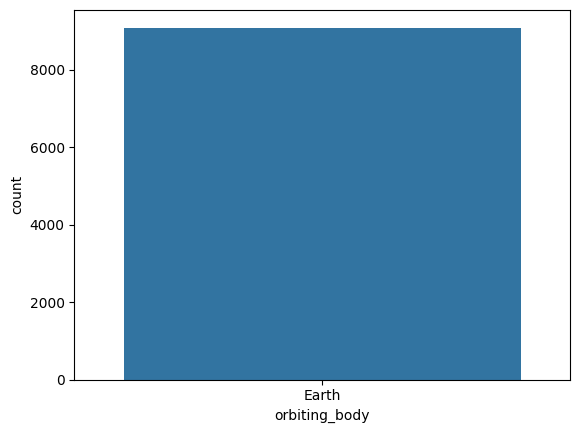

In [574]:
sns.countplot(data=data, x='orbiting_body')
plt.show()
#all the values in this feature are the same hence, it doesn't provide useful information for prediction

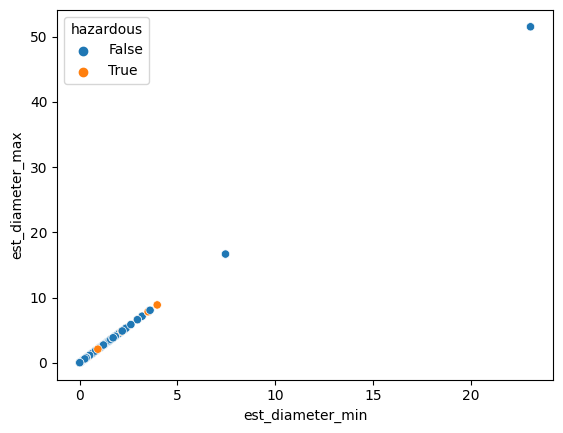

In [575]:
sns.scatterplot(data=data, x='est_diameter_min', y='est_diameter_max', hue='hazardous')
plt.show()
#The following scatter plot tells us that most of the data points are clustered within a specific range 
#for 'est_diameter_min' (0-5) and 'est_diameter_max' (0-10) indicates that the majority of the Near-Earth Objects 
#in this dataset are relatively small in size.

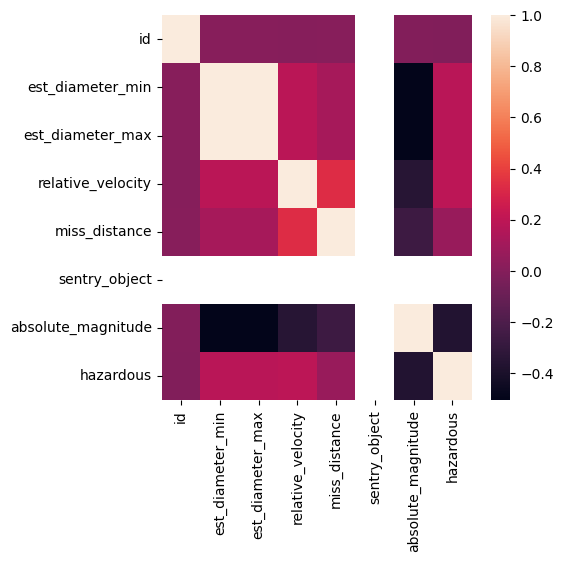

In [576]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
sns.heatmap(data = data.corr(numeric_only = True), ax = ax);

In [577]:
#heatmap shows that 'est_diameter_min' and 'est_diameter_max' have high correlation
#hence create another feature that combines these two, in this case take the mean
#and drop the original two features
data['avg_est_diameter'] = (data['est_diameter_min'] + data['est_diameter_max']) / 2
data = data.drop(columns=['est_diameter_min', 'est_diameter_max'])

In [578]:
y = data['hazardous']
#drop the features that don't contain useful information
X = data.drop(columns = ['hazardous','name', 'id','orbiting_body', 'sentry_object',])
X

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,75374.759095,1.070689e+06,24.60,0.051706
1,33274.114790,1.598217e+07,21.50,0.215547
2,74702.349802,2.330585e+06,23.93,0.070395
3,33078.313997,4.561178e+07,26.70,0.019658
4,51956.093518,3.613123e+06,23.30,0.094090
...,...,...,...,...
9078,23099.050602,5.684655e+06,27.35,0.014573
9079,10471.823883,5.344484e+07,20.00,0.430073
9080,63346.840101,6.688082e+07,17.27,1.511968
9081,23682.903814,4.247773e+05,27.70,0.012403


In [579]:
#apply same feature dropping and permutation on unseen data to ensure uniformity
unseen_data = unknown_objects
unseen_data['avg_est_diameter'] = (unseen_data['est_diameter_min'] + unseen_data['est_diameter_max']) / 2
unseen_data = unseen_data.drop(columns = ['est_diameter_min', 'est_diameter_max','name','id','orbiting_body', 'sentry_object'])
unseen_data

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,13424.551015,4.402380e+07,22.60,0.129880
1,42382.349410,2.360300e+07,21.09,0.260341
2,34025.400503,4.754401e+07,32.10,0.001635
3,31231.743804,6.324553e+07,21.39,0.226748
4,12905.227080,3.856273e+07,23.00,0.108030
...,...,...,...,...
1495,59142.861233,3.919877e+07,25.58,0.032926
1496,42876.660182,4.656072e+07,20.30,0.374578
1497,61043.549488,5.129316e+07,25.06,0.041835
1498,48822.182935,2.540669e+07,19.60,0.517062


In [580]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [581]:
#Since the majority of the 'hazardous' values are 'False', our dataset has a class imbalance problem. 
#An imbalanced dataset can lead to poor model performance, as the model might be biased towards the 
#majority class. To address this, we use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,13138.123203,4.325998e+07,22.600000,0.129880
1,52828.229583,4.922998e+07,26.200000,0.024748
2,32099.306665,7.176616e+07,21.500000,0.215547
3,68049.752120,7.330472e+07,24.200000,0.062165
4,51667.916601,7.868105e+06,22.600000,0.129880
...,...,...,...,...
11829,37366.654381,4.654968e+07,18.046720,1.245661
11830,54537.427613,4.580843e+07,20.632227,0.353894
11831,74014.486134,3.954805e+07,20.675248,0.323123
11832,63418.213759,5.524250e+07,20.539989,0.335738


In [582]:
#scaling the features, since there are no missing values we don't have imputer in the pipeline
num_pipe = Pipeline([('scaler', StandardScaler())])
X_train_scaled = num_pipe.fit_transform(X_train)
X_test_scaled = num_pipe.transform(X_test)
X_valid_scaled = num_pipe.transform(X_valid)
unseen_data_scaled = num_pipe.transform(unseen_data)

#converting back to pandas dataframe to help with further analysis
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_valid = pd.DataFrame(X_valid_scaled, columns = X_valid.columns)
y_train = pd.DataFrame(y_train, columns = ['hazardous'])
y_test = pd.DataFrame(y_test, columns = ['hazardous'])
y_valid = pd.DataFrame(y_valid, columns = ['hazardous'])
unseen_data = pd.DataFrame(unseen_data_scaled, columns = unseen_data.columns)

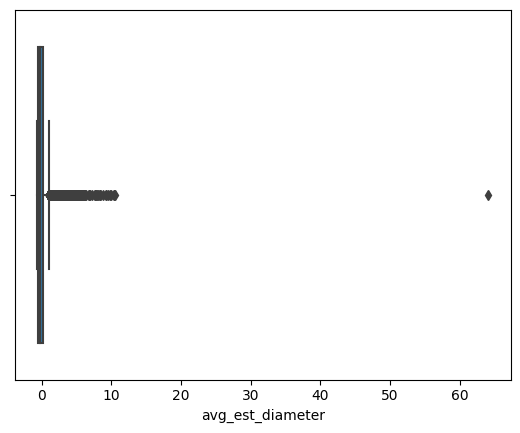

In [583]:
sns.boxplot(data=X_train, x='avg_est_diameter')
plt.show()
#there's one outlier

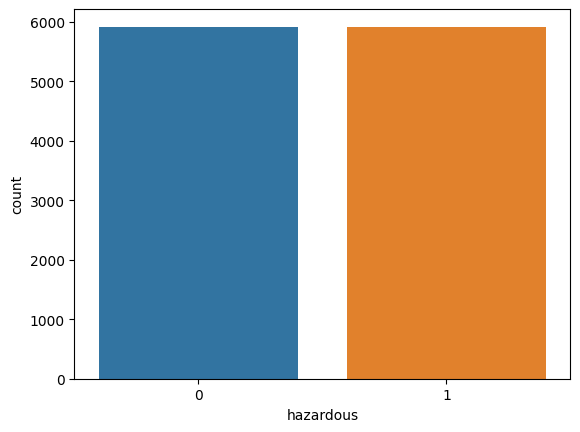

In [584]:
sns.countplot(data=y_train, x='hazardous')
plt.show()
#SMOTE has balanced the classes in 'hazardous'

In [585]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_velocity,11834.0,-1.152816e-16,1.000042,-2.184248,-0.734107,-0.081741,0.595844,4.626598
miss_distance,11834.0,5.764078e-17,1.000042,-1.807540,-0.832052,0.081118,0.837934,1.667839
absolute_magnitude,11834.0,8.453982e-16,1.000042,-4.154162,-0.677194,-0.272983,0.722289,3.708232
avg_est_diameter,11834.0,-7.685438e-17,1.000042,-0.603041,-0.492873,-0.182700,0.128828,64.111298


In [586]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11834 entries, 0 to 11833
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relative_velocity   11834 non-null  float64
 1   miss_distance       11834 non-null  float64
 2   absolute_magnitude  11834 non-null  float64
 3   avg_est_diameter    11834 non-null  float64
dtypes: float64(4)
memory usage: 369.9 KB


In [587]:
# Reset the index of X_train and y_train
X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Calculate the mean and standard deviation of the columns in X_train
avg_est_diameter_mean = X_train_reset['avg_est_diameter'].mean()
avg_est_diameter_std = X_train_reset['avg_est_diameter'].std()

relative_velocity_mean = X_train_reset['relative_velocity'].mean()
relative_velocity_std = X_train_reset['relative_velocity'].std()

# Define an outlier threshold (e.g., 10 standard deviations from the mean)
threshold = 10

# Create a boolean mask for rows without outliers in the training set based on the threshold
mask = (abs(X_train_reset['avg_est_diameter'] - avg_est_diameter_mean) <= threshold * avg_est_diameter_std) & \
       (abs(X_train_reset['relative_velocity'] - relative_velocity_mean) <= threshold * relative_velocity_std)

# Filter the training set using the mask
X_train_no_outliers = X_train_reset[mask]

# Update y_train to match the filtered X_train
y_train_no_outliers = y_train_reset[mask]

X_train = X_train_no_outliers
y_train = y_train_no_outliers

In [588]:
X_train

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,-1.678386,0.202772,0.188707,-0.379905
1,-0.053567,0.480288,1.460824,-0.562382
2,-0.902160,1.527886,-0.199996,-0.231213
3,0.569566,1.599407,0.754092,-0.497439
4,-0.101067,-1.442426,0.188707,-0.379905
...,...,...,...,...
11829,-0.686527,0.355694,-1.420268,1.556750
11830,0.016404,0.321237,-0.506638,0.008915
11831,0.813749,0.030222,-0.491435,-0.044494
11832,0.379962,0.759781,-0.539231,-0.022598


In [589]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 11833
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   relative_velocity   11830 non-null  float64
 1   miss_distance       11830 non-null  float64
 2   absolute_magnitude  11830 non-null  float64
 3   avg_est_diameter    11830 non-null  float64
dtypes: float64(4)
memory usage: 462.1 KB


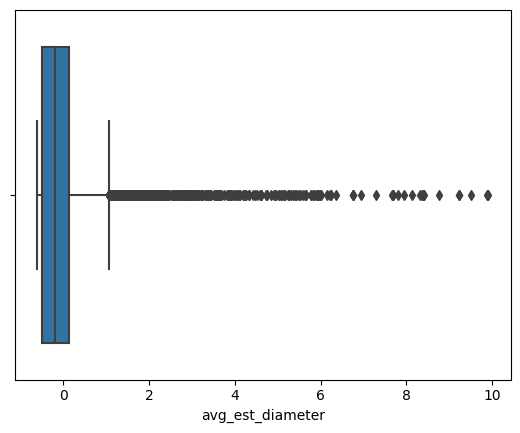

In [590]:
sns.boxplot(data=X_train, x='avg_est_diameter')
plt.show()
#as seen in the boxplot here, that outlier has been removed

In [591]:
#saving the cleaned datasets in csv files
# Write X_train and y_train to CSV files
X_train.to_csv("../cleaned_datasets/X_train.csv", index=False)
y_train.to_csv("../cleaned_datasets/y_train.csv", index=False)

# Write X_test and y_test to CSV files
X_test.to_csv("../cleaned_datasets/X_test.csv", index=False)
y_test.to_csv("../cleaned_datasets/y_test.csv", index=False)

# Write X_valid and y_valid to CSV files
X_valid.to_csv("../cleaned_datasets/X_valid.csv", index=False)
y_valid.to_csv("../cleaned_datasets/y_valid.csv", index=False)

# Write unseen_data to a CSV file
unseen_data.to_csv("../cleaned_datasets/unseen_data.csv", index=False)

In [592]:
#to use the cleaned data, simply import the corresponding datasets, as the example shown below
X_train_final = pd.read_csv('../cleaned_datasets/X_train.csv')
X_train_final

,relative_velocity,miss_distance,absolute_magnitude,avg_est_diameter
0,-1.678386,0.202772,0.188707,-0.379905
1,-0.053567,0.480288,1.460824,-0.562382
2,-0.902160,1.527886,-0.199996,-0.231213
3,0.569566,1.599407,0.754092,-0.497439
4,-0.101067,-1.442426,0.188707,-0.379905
...,...,...,...,...
11825,-0.686527,0.355694,-1.420268,1.556750
11826,0.016404,0.321237,-0.506638,0.008915
11827,0.813749,0.030222,-0.491435,-0.044494
11828,0.379962,0.759781,-0.539231,-0.022598
